In [1]:
!pip install matplotlib

import os
import time
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Mounted at /content/drive/


Comparing DTX values for Blockchain Model - Duration: 2 minutes


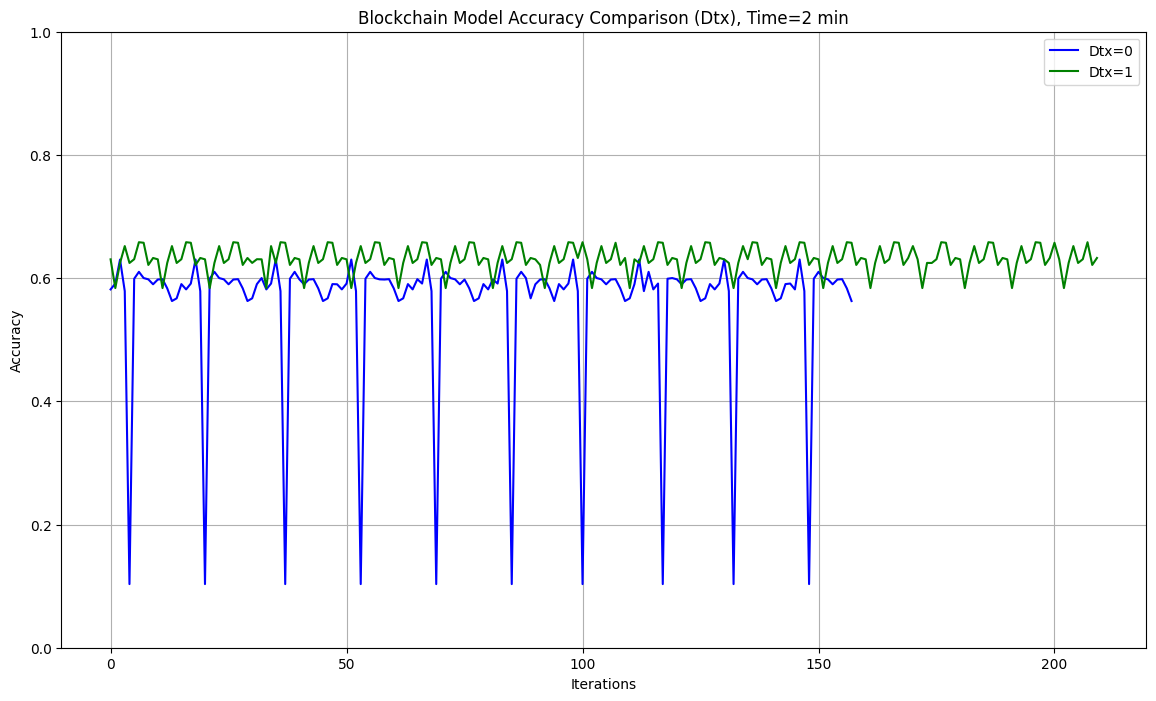

Comparing DTX values for Blockchain Model - Duration: 5 minutes


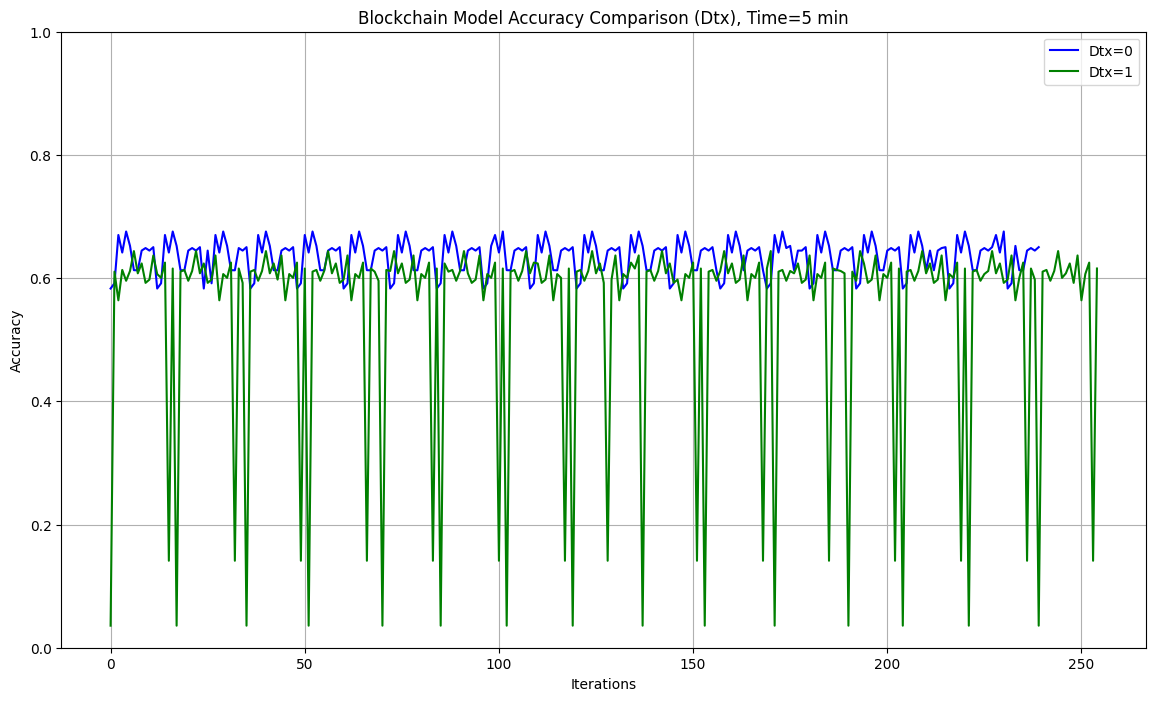

In [14]:
import os
import time
import matplotlib.pyplot as plt

# Define shared folder path
vbflshare = '/content/drive/My Drive/VBFL'

# Define the current parameter to test and its values
current_parameter = 'dtx'  # Change this to the parameter you are testing
parameter_values = {
    "vh": ["0.02", "0.1"],
    "pow": ["0", "1"],
    "ha": ["*,*,*", "12,5,3"],
    "dtx": ["0", "1"],
    # Add other parameters as needed
}

# Function to generate file paths dynamically based on the current parameter and value
def generate_file_paths(time_mark, parameter, value):
    return os.path.join(vbflshare, f"Blockchain{time_mark}_{parameter}{value}.txt")

# Function to check for file existence and that they are not empty
def check_files_exist(file_paths):
    for file_path in file_paths:
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            return False
        if os.path.getsize(file_path) == 0:
            print(f"File is empty: {file_path}")
            return False
    return True

# Function to read data from the output files and extract accuracies
def read_data(file_path):
    accuracies = []
    with open(file_path, 'r') as file:
        for line in file:
            if "model accuracy becomes" in line:
                parts = line.split('-')
                if len(parts) == 2:
                    try:
                        accuracies.append(float(parts[1].strip()))
                    except ValueError as e:
                        print(f"Error parsing line '{line}': {e}")
    return accuracies

# Function to plot comparatives accuracies for multiple parameter values
def plot_comparative_accuracies(time_mark, parameter, values):
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'green']  # Define more colors if necessary
    for i, value in enumerate(values):
        file_path = generate_file_paths(time_mark, parameter, value)
        accuracies = read_data(file_path)
        plt.plot(accuracies, label=f'{parameter.capitalize()}={value}', color=colors[i])

    plt.title(f'Blockchain Model Accuracy Comparison ({parameter.capitalize()}), Time={time_mark} min')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Time marks to compare
time_marks = ['2', '5']

# Run the comparison for the current parameter
for time_mark in time_marks:
    file_paths = [generate_file_paths(time_mark, current_parameter, value) for value in parameter_values[current_parameter]]
    if check_files_exist(file_paths):
        # Print a short description before the graph
        print(f"Comparing {current_parameter.upper()} values for Blockchain Model - Duration: {time_mark} minutes")
        plot_comparative_accuracies(time_mark, current_parameter, parameter_values[current_parameter])
    else:
        print(f"Waiting for files: {file_paths}")
        time.sleep(60)